# Proyecto DS - Parte III - Desafío 5 - Curso Data Science - CoderHouse

**Autor:** Yojan Andrés Alcaraz Pérez

**Fecha:** Marzo 4 de 2023.

In [1]:
! pip install -q statsmodels
! pip install -q mlxtend 


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Feauture selection
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import statsmodels.api as sm

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Para algoritmo de clasificación:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set_style('whitegrid')


## Contexto comercial

También conocida como presión arterial alta, la hipertensión es una condición en la que la fuerza del flujo sanguíneo contra las paredes de las arterias es demasiado alta, lo que puede aumentar significativamente el riesgo de complicaciones graves de salud: enfermedades cardíacas, cerebrales, renales y de otro tipo. Esta enfermedad crónica afecta a una gran cantidad de personas en todo el mundo: según datos de la OMS es una de las principales causas de muerte prematura en todo el mundo y se estima que 1280 millones de adultos entre los 30 y 79 años en todo el mundo padecen esta enfermedad y que cerca del 42 % son diagnosticados con esta enfermedad y tratados oportunamente.

Los factores de riesgo para la hipertensión incluyen la edad, la obesidad, el consumo de tabaco, la falta de actividad física, el consumo excesivo de alcohol, las dietas poco saludables (consumo excesivo de sal, dieta alta en grasas saturadas y grasas trans, bajo consumo de frutas y verduras) y la predisposición genética.

El resultado de la medición de la presión arterial es medido por dos números, de acuerdo con la OMS "el primer número (sistólico) representa la presión en los vasos sanguíneos cuando el corazón se contrae o late. El segundo número (diastólico) representa la presión en los vasos cuando el corazón descansa entre latidos". Este organimo especializado en salud indica también que "se diagnostica hipertensión si, cuando se mide en dos días diferentes, las lecturas de presión arterial sistólica en ambos días son ≥140 mmHg y/o las lecturas de presión arterial diastólica en ambos días son ≥90 mmHg".

El tratamiento de la hipertensión incluye cambios en el estilo de vida y medicamentos. Los cambios en el estilo de vida incluyen la pérdida de peso, la reducción del consumo de sal, el aumento de la actividad física y la reducción del consumo de alcohol y tabaco. Dado que es una enfermedad que puede evitarse, es importante que las personas comprendan los factores de riesgo, los síntomas y las complicaciones de la hipertensión y se sometan a controles regulares de la presión arterial para detectar y tratar la enfermedad a tiempo.

Dado lo anterior y la premisa de que la hipertensión puede ser tratada a tiempo, esta se convierte en una de las enfermedades con las que el ámbito médico tiene el compromiso de luchar inalcanzablemente en miras a la investigación y el desarrollo de medicamentos, pues con los hábitos de la sociedad actual hay una gran demanda de tratamientos efectivos y seguros para esta enfermedades. La educación y la promoción de la salud tienen también un compromiso importante con esta enfermedad: los proveedores de atención médica, las organizaciones sin fines de lucro y las empresas de la industria de la salud trabajan juntos para aumentar la conciencia sobre la hipertensión y fomentar cambios en el estilo de vida saludable, como la dieta y la adecuada alimentación y el ejercicio, que pueden ayudar a prevenir y tratar la enfermedad oportunamente.

## Problema comercial

La hipertensión es llamada un "asesino silencioso". La mayoría de las personas con hipertensión desconocen el problema porque es posible que no presente signos o síntomas de advertencia. Por esta razón, es esencial que la presión arterial sea medida regularmente (OMS, 2021). Y es que la detección de esta enfermedad solo puede darse si se cumple con chequeos periódicos por parte de un profesional, aunque ya existen dispositivos que permiten a las personas medir su propia presión arterial, no está demás la evaluación por parte de personas especializadas en el área con el fin de evaluar posibles riesgos.

Su alta prevalencia, sus factores de riesgo asociados que cada vez aumentan más, sus complicaciones graves para la salud y los costos económicos asociados convierten esta enfermedad en un tema importante para los entes médicos, y es que según la OMS, "el número de adultos con hipertensión aumentó de 594 millones en 1975 a 1130 millones en 2015", aumento que ha sido observado principalmente en países de ingresos bajos y medianos.


La OMS en su tarea de velar por la salud mundial ha lanzado varias estrategias para ayudar a gobiernos de varios países a implementar cuidados para prevenir y tratar la hipertensión, una de estas estrategias es la implementación del programa Global Hearts en 2017. Desde la implementación esta estrategia en 18 países de ingresos bajos y medianos, cerca 3 millones de personas han recibido tratamiento de hipertensión basado en protocolos a través de modelos de atención centrados en la persona. Este tipo de programas demuestran la viabilidad y eficacia de los programas estandarizados de control de la hipertensión, por lo que es importante y eficaz la concientización de las personas acerca de esta enfermedad, sus factores de riesgo, síntomas y complicaciones


## Contexto analítico

La implementación de programas de prevención ha permitido llevar a personas de varios paises el mensaje de la importancia de la prevención de la hipertensión mediante procedimientos de rutina que permitan su identificación. La estadística ha permitido obtener conclusiones importantes alrededor de este tema, sin embargo, la implementación de técnicas y análisis más avanzados permitirá ir más allá. 

Los modelos estadísticos pueden ayudar a analizar y comprender la hipertensión y su impacto en la salud pública, se pueden utilizar modelos para evaluar el riesgo de desarrollar hipertensión y para identificar los factores de riesgo más importantes y a los que se les debería brindar especial atención, esto puede ayudar a los profesionales de la salud y a los encargados de formular políticas a tomar decisiones informadas sobre la mejor manera de abordar esta enfermedad. Los modelos estadísticos permiten también identificar patrones y tendencias, lo que puede ser útil para orientar los esfuerzos de prevención y tratamiento de esta enfermedad.

Por las razones anteriores, el presente análisis busca brindar mediante la implementación de técnicas estadísticas herramientas que puedan ser útiles en la toma de decisiones sobre la prevención y tratamiento del problema estudiado: la hipertensión.

## Objetivo

Aplicar herramientas y técnicas estadísticas a un conjunto de datos con registros de factores asociados a la hipertensión, con el fin de evaluar el riesgo de desarrollar esta enfermedad e identificar los factores de riesgo más importantes.

## Conjunto de datos

El conjunto de datos *hipertension* ha sido tomado de **Kaggle** (https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=hypertension_data.csv) y en crudo contiene 26083 observaciones de 14 variables, una de las cuales es considerada como la variable objetivo, se presenta una breve descrpción de cada una de estas variables:

- **age:** edad del paciente en años.
- **sex:** género del paciente (1: masculino, 0: femenino)
- **cp:** Tipo de dolor torácico: 0: asintomático 1: angina típica 2: angina atípica 3: dolor no anginoso.
- **trestbps:** Presión arterial en reposo (en mm Hg).
- **chol:** Colesterol sérico en mg/dl.
- **fbs:** si la gleucemia en ayunas del paciente > 120 mg/dl (1: sí; 0: no)
- **thalach:** Frecuencia cardíaca máxima alcanzada.
- **restecg**: Resultados del electrocardiograma en reposo: 0: normal 1: onda ST-T anormal.
- **exang**: Angina inducida por el ejercicio (1: sí; 0: no)
- **oldpeak**: Depresión del ST (dolor de garganta logopedia) inducida por el ejercicio en relación con el reposo.
- **thal:** clasificación de frecuencia cardiaca: 3: Normal; 6: Defecto fijo; 7: Defecto reversible
- **slope:** Pendiente del pico de ejercicio del segmento ST. 0: pendiente ascendente 1: llano 2: pendiente descendente
- **target:** variable objetivo. Si el paciente tiene hipertensión (1) o no (0)

In [3]:
# Lectura de la base de datos:
hypertension = pd.read_csv("/workspaces/DSCH-Desafios/data/hypertension_data.csv")

In [4]:
hypertension.shape

(26083, 14)

La base de datos objeto de análisis tiene 26083 registros de 14 variables.

In [5]:
# Encabezado de la base de datos:
hypertension.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Muestra de 10 registros:
hypertension.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
18562,34.0,1.0,0,130,206,0,0,132,1,2.4,1,2,3,0
515,51.0,1.0,0,145,307,0,0,146,1,1.0,1,0,3,0
7087,59.0,1.0,0,142,226,0,0,111,1,0.0,2,0,3,1
9660,61.0,0.0,0,132,341,1,0,136,1,3.0,1,0,3,0
24456,87.0,0.0,3,150,240,0,1,171,0,0.9,2,0,2,1
21700,70.0,0.0,2,120,209,0,1,173,0,0.0,1,0,2,1
14047,48.0,0.0,2,112,230,0,0,165,0,2.5,1,1,3,0
23152,79.0,0.0,0,112,149,0,1,125,0,1.6,1,0,2,1
12294,46.0,1.0,0,140,261,0,0,186,1,0.0,2,0,2,1
18643,46.0,1.0,3,160,234,1,0,131,0,0.1,1,1,2,1


## Adecuación del dataset

Antes de comenzar el análisis es primordial asegurarse de la presencia de datos faltantes o NA, para ello:

In [7]:
hypertension.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

La variable *sex* tiene 25 registros NA, por lo que por ahora se procede a eliminar todas las observaciones que involucren estos valores faltantes:

In [8]:
hypertension.dropna(inplace = True)

In [9]:
# Dimensión del dataframe sin NA´s:
hypertension.shape

(26058, 14)

In [10]:
# Tipo de dato de cada una de las variables
hypertension.dtypes

age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Dado que algunas variables de tipo factor han sido cargadas como entero, se debe hacer la conversión:

In [11]:
colnames_categ = ["target","sex","cp","fbs","restecg","exang","slope", "ca", "thal"]
for i in colnames_categ:
  hypertension[i] = hypertension[i].astype("object")

In [12]:
hypertension.dtypes

age         float64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

Dado lo anterior, se tiene entonces las siguientes variables divididas por tipo de variable:

- Variables discretas:
    - sex: Sexo.
    - cp: tipo de dolor torácico.
    - fbs: Gleucemia en ayunas del paciente
    - restecg: Resultado de electrocardiograma en reposo.
    - exang: Angina inducida por el ejercicio.
    - slope: Pendiente del pico de ejercicio del segmento ST.
    - ca: Número de vasos mayores (0-3) coloreados por flouroscopia.
    - thal: clasificación de frecuencia cardiaca.
    - target: Hipertensión.



- Variables continuas:
    - age: edad.
    - trestbps: presión arterial en reposo.
    - chol: nivel de colesterol sérico.
    - thalach: frecuencia cardíaca máxima alcanzada.
    - oldpeak: nivel de descenso del dolor de garganta logopedia
    


In [13]:
## Variables continuas:
colnames_continuas = ["age","trestbps","chol","thalach","oldpeak"]

## Breve resumen numérico

Antes de proceder a analizar gráficamente el comportamiento de la base de datos se presenta un breve resumen numérico:

In [14]:
# Resumen numérico de las variables continuas:
hypertension.describe()

,age,trestbps,chol,thalach,oldpeak
count,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,131.590682,246.286591,149.643181,1.039742
std,15.190407,17.597086,51.651701,22.865871,1.165673
min,11.000000,94.000000,126.000000,71.000000,0.000000
25%,44.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,240.000000,153.000000,0.800000
75%,67.000000,140.000000,275.000000,166.000000,1.600000
max,98.000000,200.000000,564.000000,202.000000,6.200000


Los pacientes en estudio se encuentran entre los 11 y los 98 años, con un promedio de edad de 55.7 años. La tensión arterial en reposo se encuentra entre 94 y 200 mm Hg con un valor promedio de 131.6 mm Hg. Por otro lado, los pacientes cuentan con un nivel de colesterol promedio de 246.3 mg/dl.

Ya que se han convertido las variables a sus respectivos tipos de dato, se procede a implementar algunas gráficas para conocer un poco más el comportamiento de la base de datos.

## Análisis descriptivo exploratorio (EDA)

Con el objetivo de poder identificar comportamientos de posible interés es importante la implementación de análisis gráficos y la condensación de los que ya se han hecho (en el desafío 2: Visualizaciones en Python) para llegar a otras conclusiones de manera más sencilla. Para esto, se presenta el análisis a continuación, en el que se organizan los análisis del desafío anterior y se proponen nuevos.

### Análisis univariado.

#### Categóricas.

Se inicia con el análisis gráfico univariado de las variables discretas.

##### Variable objetivo: *target*: ¿El paciente es hipertenso?

¿Cómo está distribuida la población respecto a la enfermedad como variable objetivo?

Es interesante analizar la cantidad de unidades muestrales (pacientes) que sufren hipertensión versus aquellos que no lo hacen, la salida del siguiente código muestra que de los 26058 pacientes registrados, 14274 sufren hipertensión y 11784 no lo hacen.

In [15]:
cant_target = pd.DataFrame(hypertension['target'].value_counts())
cant_target.index = ("Hipertenso", "No Hipertenso")
print(cant_target)

               target
Hipertenso      14274
No Hipertenso   11784


El siguiente gráfico permite realizar la comparación:

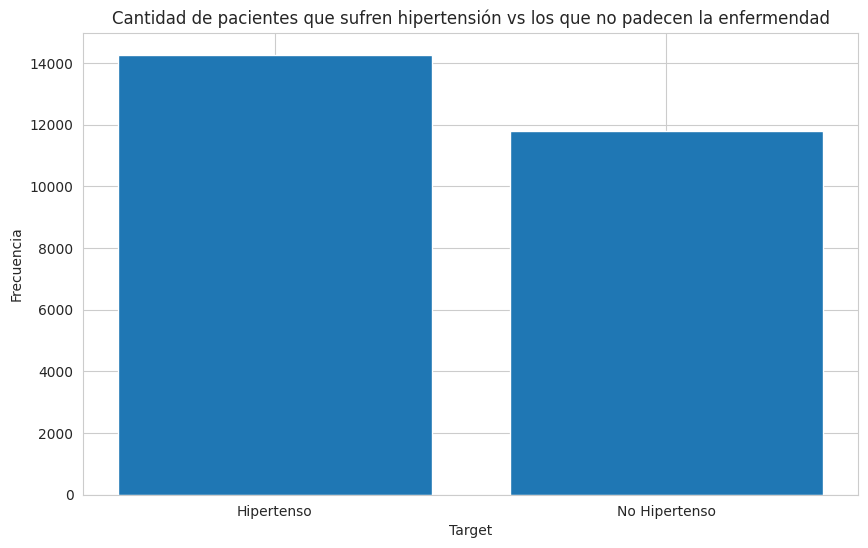

In [16]:
plt.figure(figsize=(10,6))
plt.bar(cant_target.index, cant_target.target)
plt.title("Cantidad de pacientes que sufren hipertensión vs los que no padecen la enfermendad")
plt.ylabel("Frecuencia")
plt.xlabel("Target")
plt.show()

¿Cómo se comporta la variable objetivo respecto al sexo de los pacientes?

Ahora, es de interés analizar la cantidad de personas con hipertensión y sin hipertensión de acuerdo al sexo.

In [17]:
data_crosstab = pd.crosstab(hypertension['sex'],
                            hypertension['target'], 
                               margins = False)
print(data_crosstab)

target     0     1
sex               
0.0     5892  7137
1.0     5892  7137


[Text(0, 0, 'No'), Text(1, 0, 'Sí')]

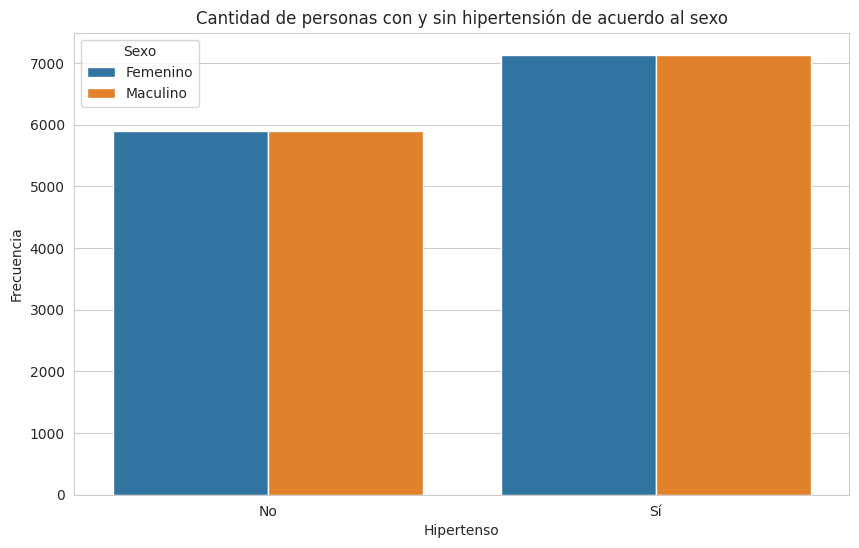

In [18]:
plt.figure(figsize=(10,6))
count_plt = sns.countplot(x='target', data=hypertension, hue = "sex")
count_plt.legend(loc='upper left',title='Sexo', labels = ("Femenino", "Maculino"))
count_plt.set(xlabel='Hipertenso', ylabel='Frecuencia')
plt.title("Cantidad de personas con y sin hipertensión de acuerdo al sexo")
count_plt.set_xticklabels(['No', 'Sí'])

Las salidas anteriores permiten concluir que la cantidad de hombres y mujeres con hipertensión es la misma: 7137 hombres y 7137 mujeres; este comportamiento se repite con las personas que no tienen hipertensión: 5892 hombres y 5892 mujeres.

##### Posibles predictoras.

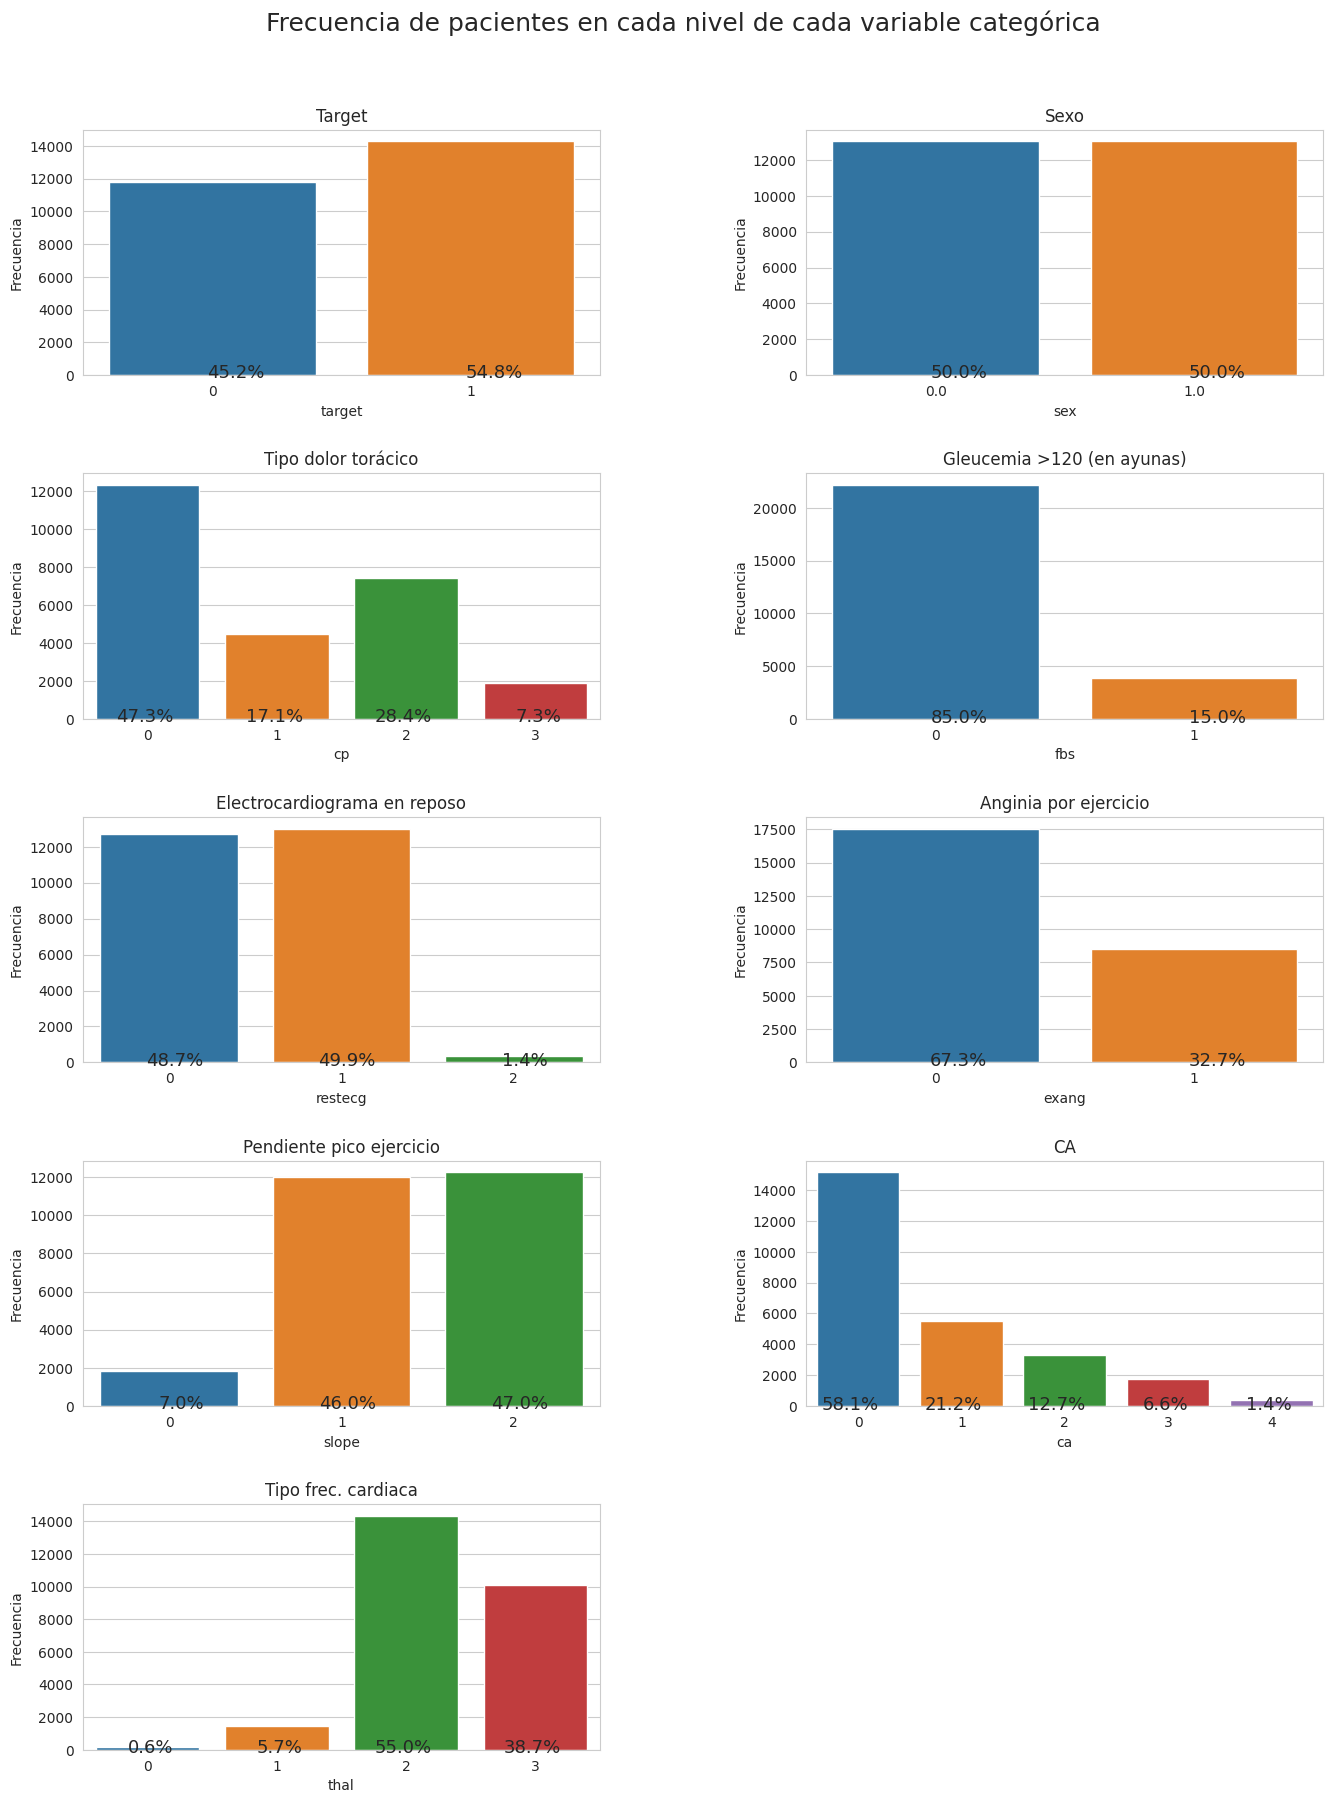

In [19]:
nom_cat = ["Target", "Sexo", "Tipo dolor torácico", "Gleucemia >120 (en ayunas)", "Electrocardiograma en reposo", "Anginia por ejercicio","Pendiente pico ejercicio", "CA", "Tipo frec. cardiaca"]
fig = plt.figure(figsize=[16,20])
fig.suptitle('Frecuencia de pacientes en cada nivel de cada variable categórica', fontsize=18)
fig.subplots_adjust(top=0.92); # Parte superior
fig.subplots_adjust(hspace=0.4, wspace=0.4); 
for i , columns in enumerate(colnames_categ): 
    entrada = np.unique(hypertension[columns] , return_counts = True)
    col= 'entrada'
    ax1 = fig.add_subplot(5, 2, i+1); # Posición de la figura
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]'))) 
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    if len(entrada[1]) == 3:
        ax1.text(2.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[2]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    if len(entrada[1]) == 4:
        ax1.text(2.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[2]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
        ax1.text(3.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[3]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    if len(entrada[1]) == 5:
        ax1.text(2.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[2]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
        ax1.text(3.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[3]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
        ax1.text(4.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[4]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)



    ax1.set_title(nom_cat[i])
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Frecuencia')

Los anteriores gráficos permiten evidenciar algunas conclusiones:

- El 50 % de los pacientes son hombres y el otro 50 % son mujeres.
- El 58 % de los pacientes sufren hipertensión.
- El 28.7 % de los pacientes padecen angina de pecho atípica y a tan solo el 7.3 % de ellos se le atribuye dolor torácico no anginoso
- En el 15 % de los pacientes se encontró un nivel de gleucemia en ayunas mayor a 120 mg/dl
- Casi la mitad de los pacientes tienen un resultado anormal en electrocardiograma.
- El 32.7 % de los pacientes tienen dolor de pecho inducido por el ejercicio.

#### Continuas.

Ahora, ¿cómo se están comportando las variables continuas?

Para responder a esto, se presenta el siguiente gráfico con la distribución de las variables continuas:

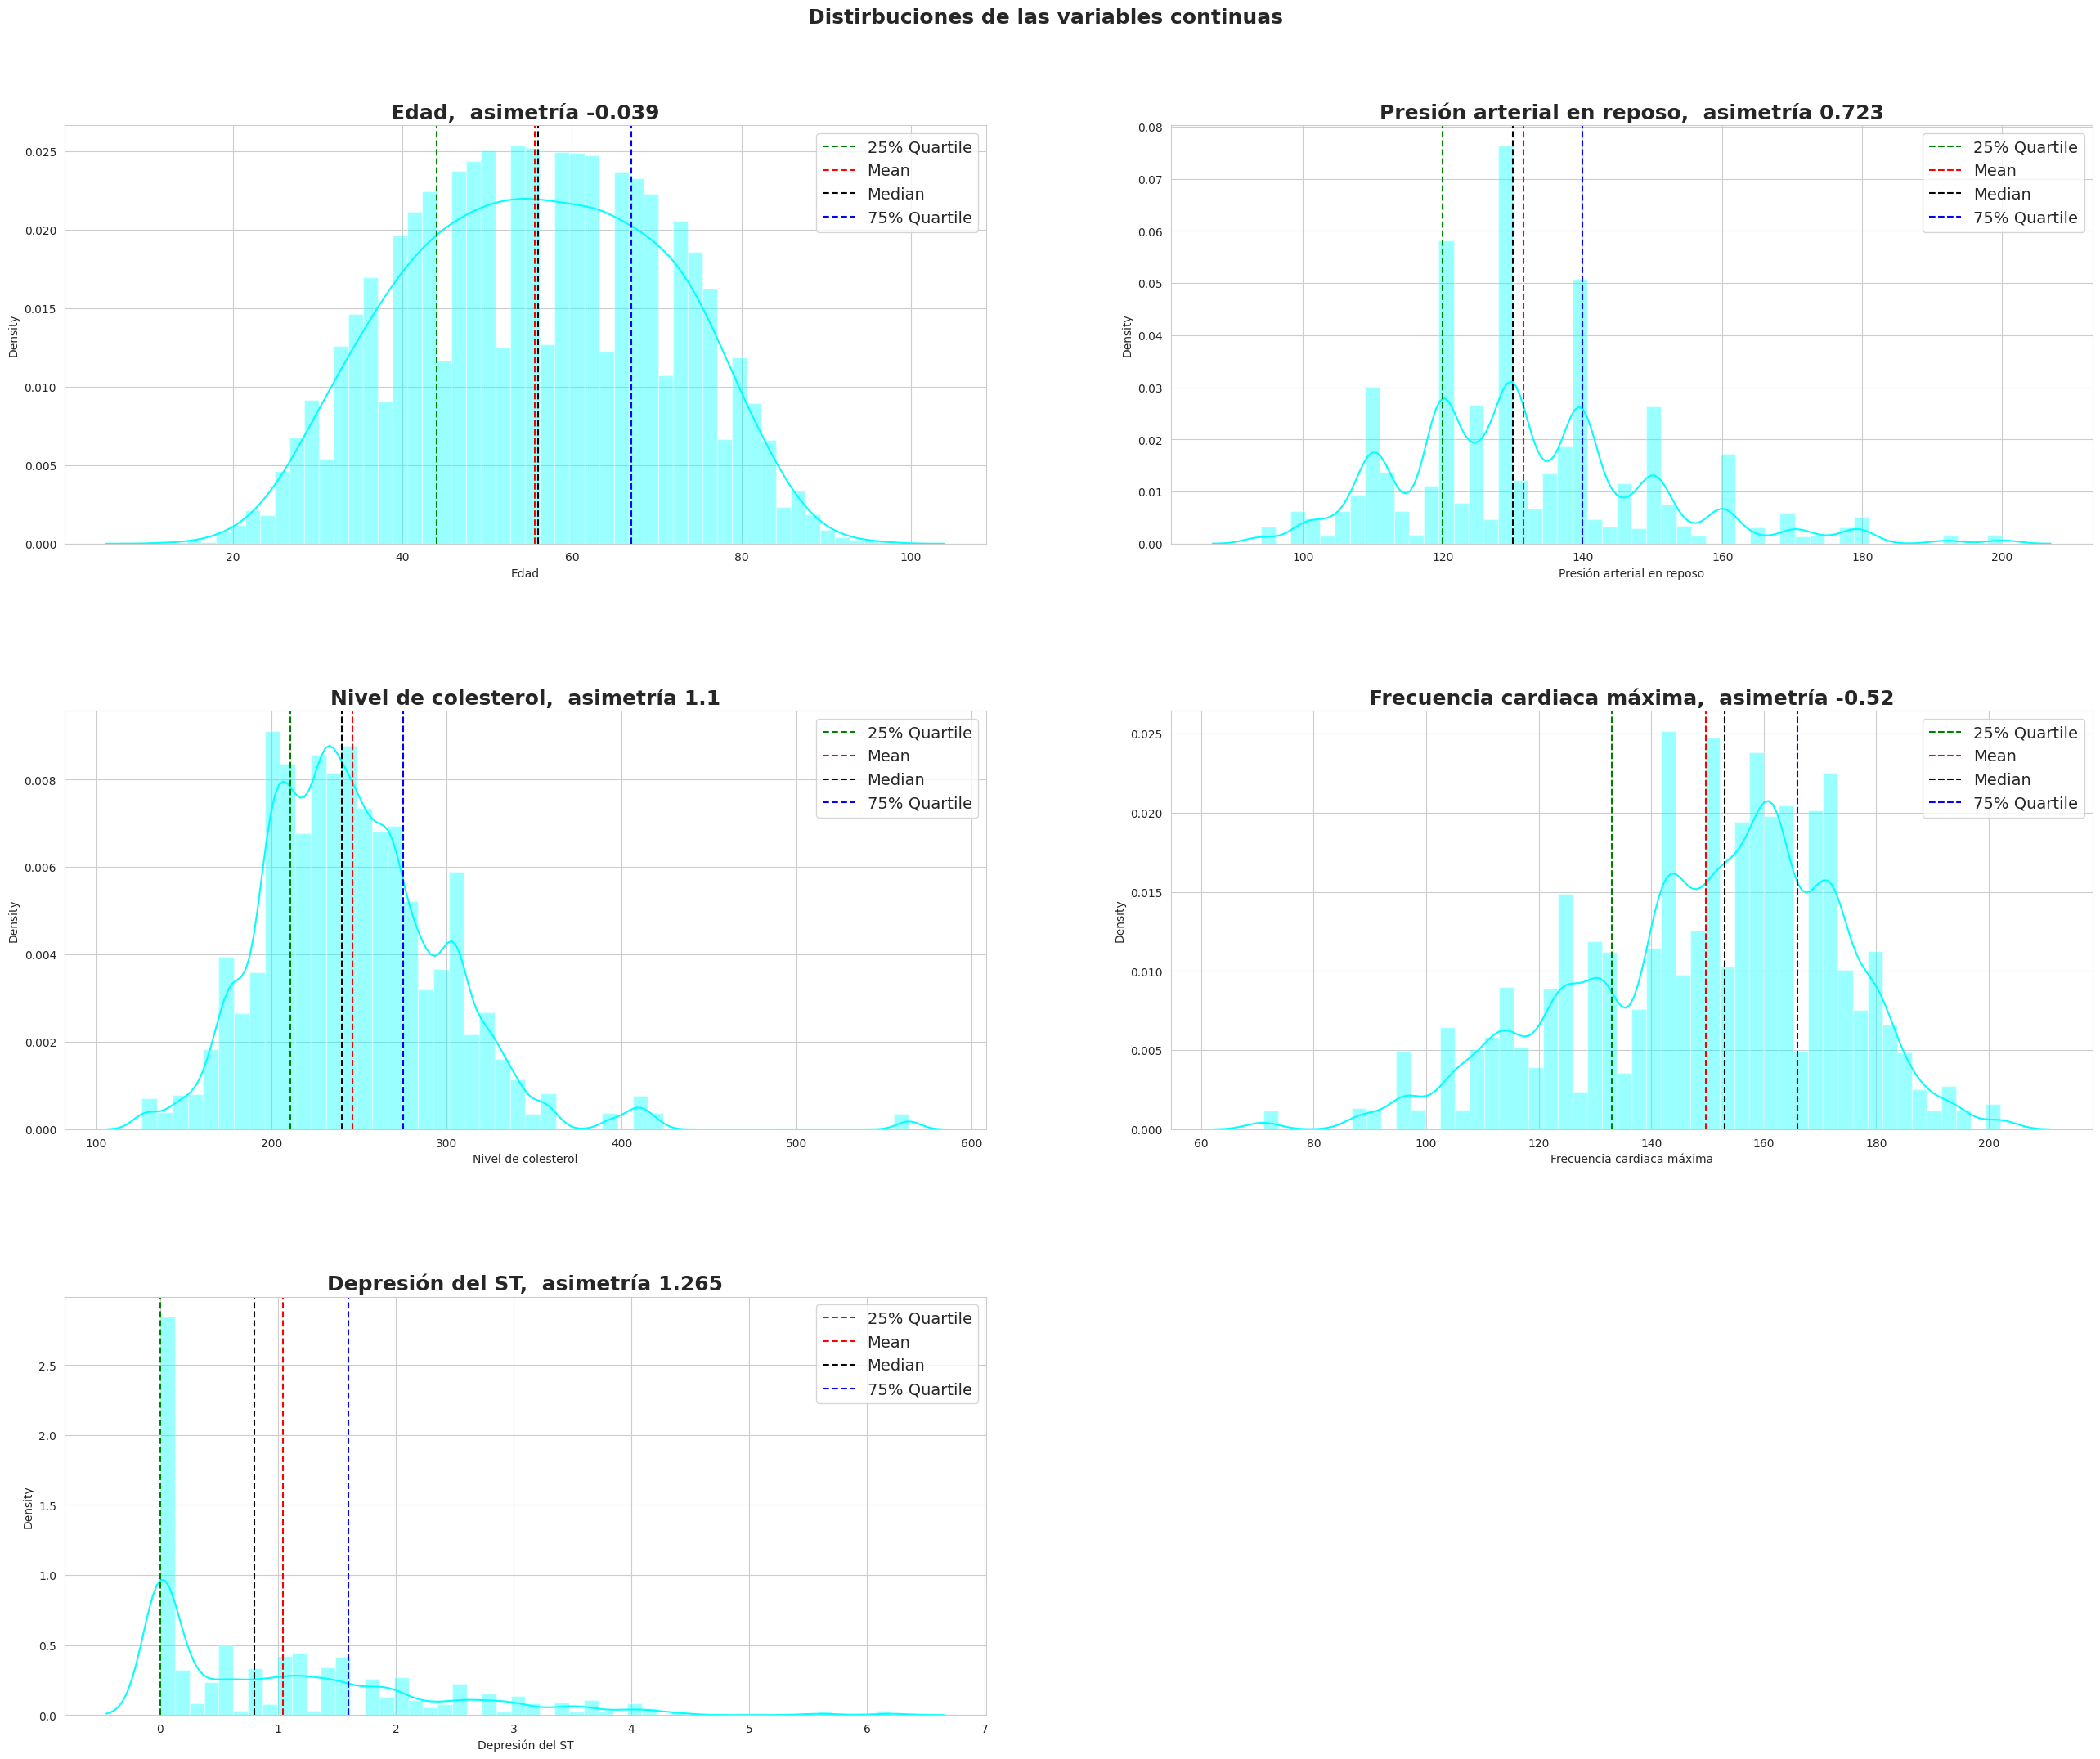

In [20]:
nom = ["Edad", "Presión arterial en reposo", "Nivel de colesterol", "Frecuencia cardiaca máxima", "Depresión del ST"]
fig = plt.figure(figsize=[32,24])
fig.suptitle('Distirbuciones de las variables continuas', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.4, wspace=0.2);
for i ,col in enumerate(colnames_continuas):
    ax = fig.add_subplot(3,2 , i+1)
    # Distribución:
    ax = sns.distplot(hypertension[col],  color="cyan") 
    # Lineas verticales
    ax.axvline(hypertension[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile') # Q1
    ax.axvline(hypertension[col].mean(),color='red',linestyle='--',label='Mean') # Media
    ax.axvline(hypertension[col].median(),color='black',linestyle='--',label='Median') # Mediana
    ax.axvline(hypertension[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile') # Q3
    ax.set_xlabel(nom[i])
    ax.set_title(f'{nom[i]},  asimetría {round(hypertension[col].skew(),3)}',fontsize=18, fontweight='bold')
    ax.legend(fontsize=14) 

A excepción de la variable edad (*age*) que presenta un valor de simetría cercano a cero, las variables continuas no parecen ser simétricas y parece haber presencia de valores atípicos, para comprobar esto se puede analizar el gráfico bolxplot de cada una de ellas:


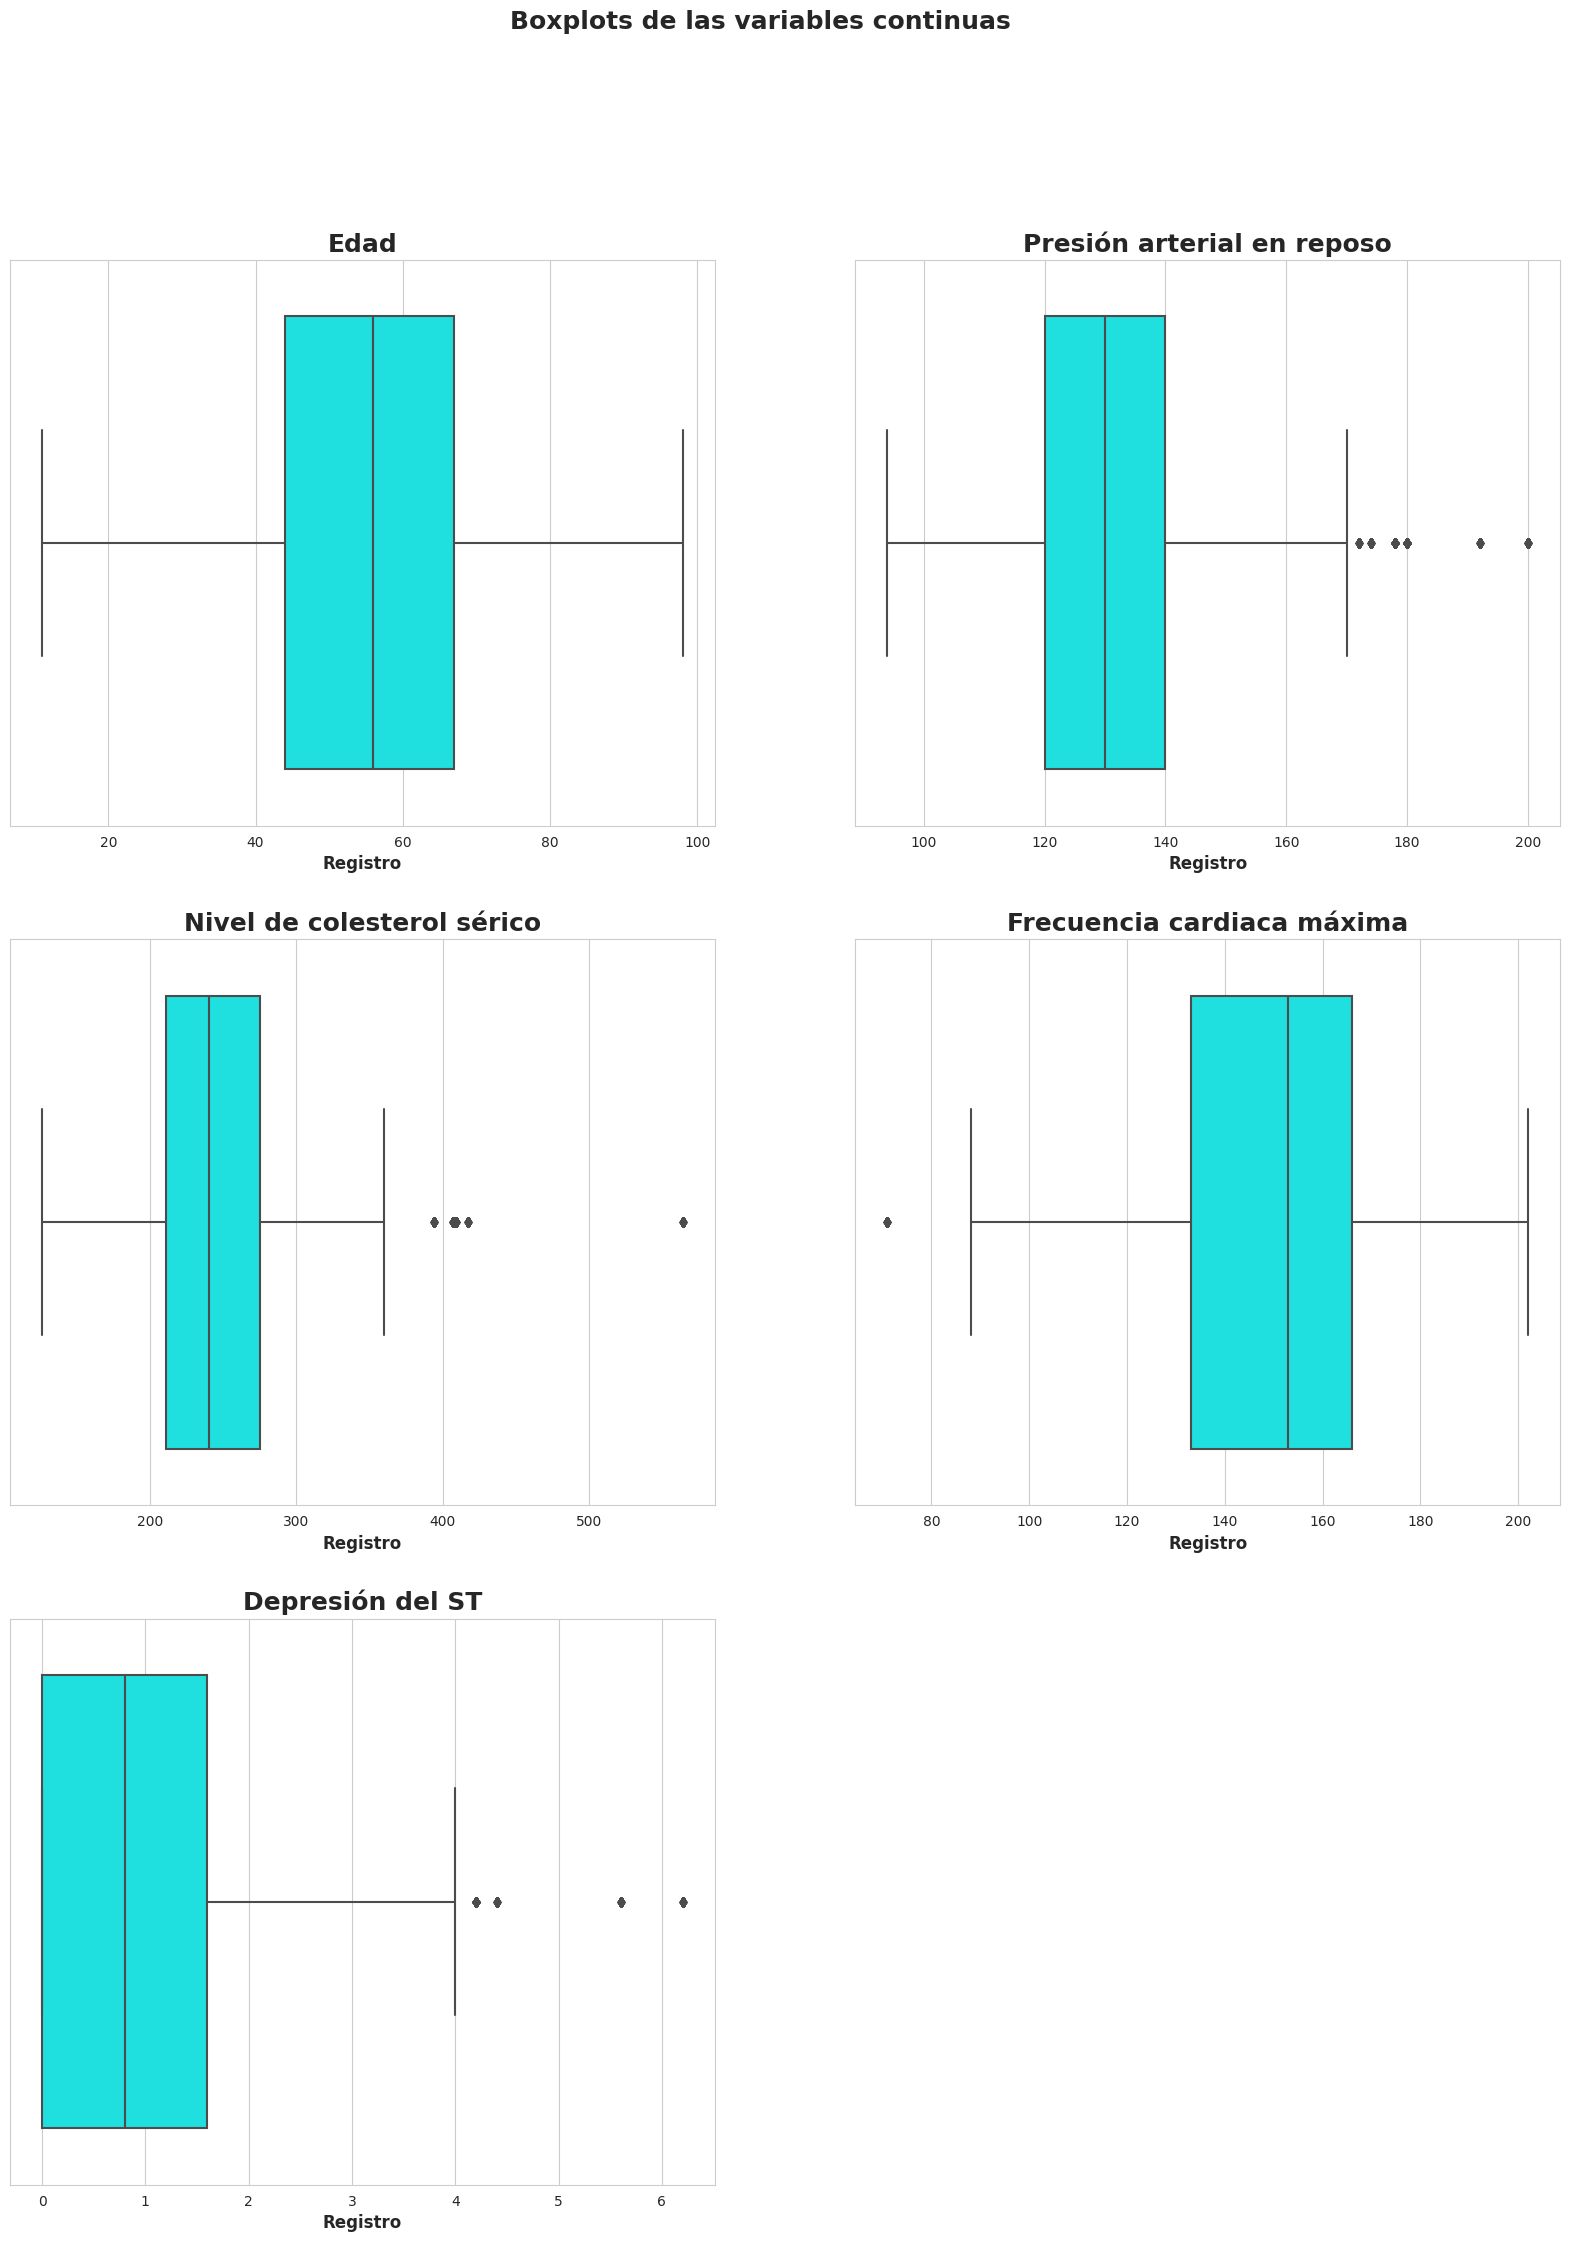

In [21]:
df_boxplot = hypertension[colnames_continuas]
name_boxplot = ["Edad", "Presión arterial en reposo", "Nivel de colesterol sérico", "Frecuencia cardiaca máxima","Depresión del ST"]
plt.figure(figsize=(20,25))
plt.suptitle('Boxplots de las variables continuas', fontsize=18, fontweight='bold')
for i,j in zip(range(7),df_boxplot.columns):
  plt.subplot(3,2,i+1)
  sns.boxplot(x=df_boxplot[j],orient='v',color='cyan')
  plt.title(name_boxplot[i],fontsize=18, fontweight='bold')
  plt.xlabel('Registro',fontsize=12, fontweight='bold')

El conjunto de boxplots anterior permite concluir que las variables: presión arterial en reposo, colesterol sérico, frecuencia cardiaca máxima y depresión del ST registran valores atípicos cuyo análisis sería de particular interés.

Por otro lado,las variables colesterol sérico y frecuencia cardiaca máxima son las que mayor dispersión en sus registros presentan.

La variable edad parece tener una distribución bastante simétrica, a diferencia del resto de variables.

### Análisis bivariado.

##### Variables categóricas.

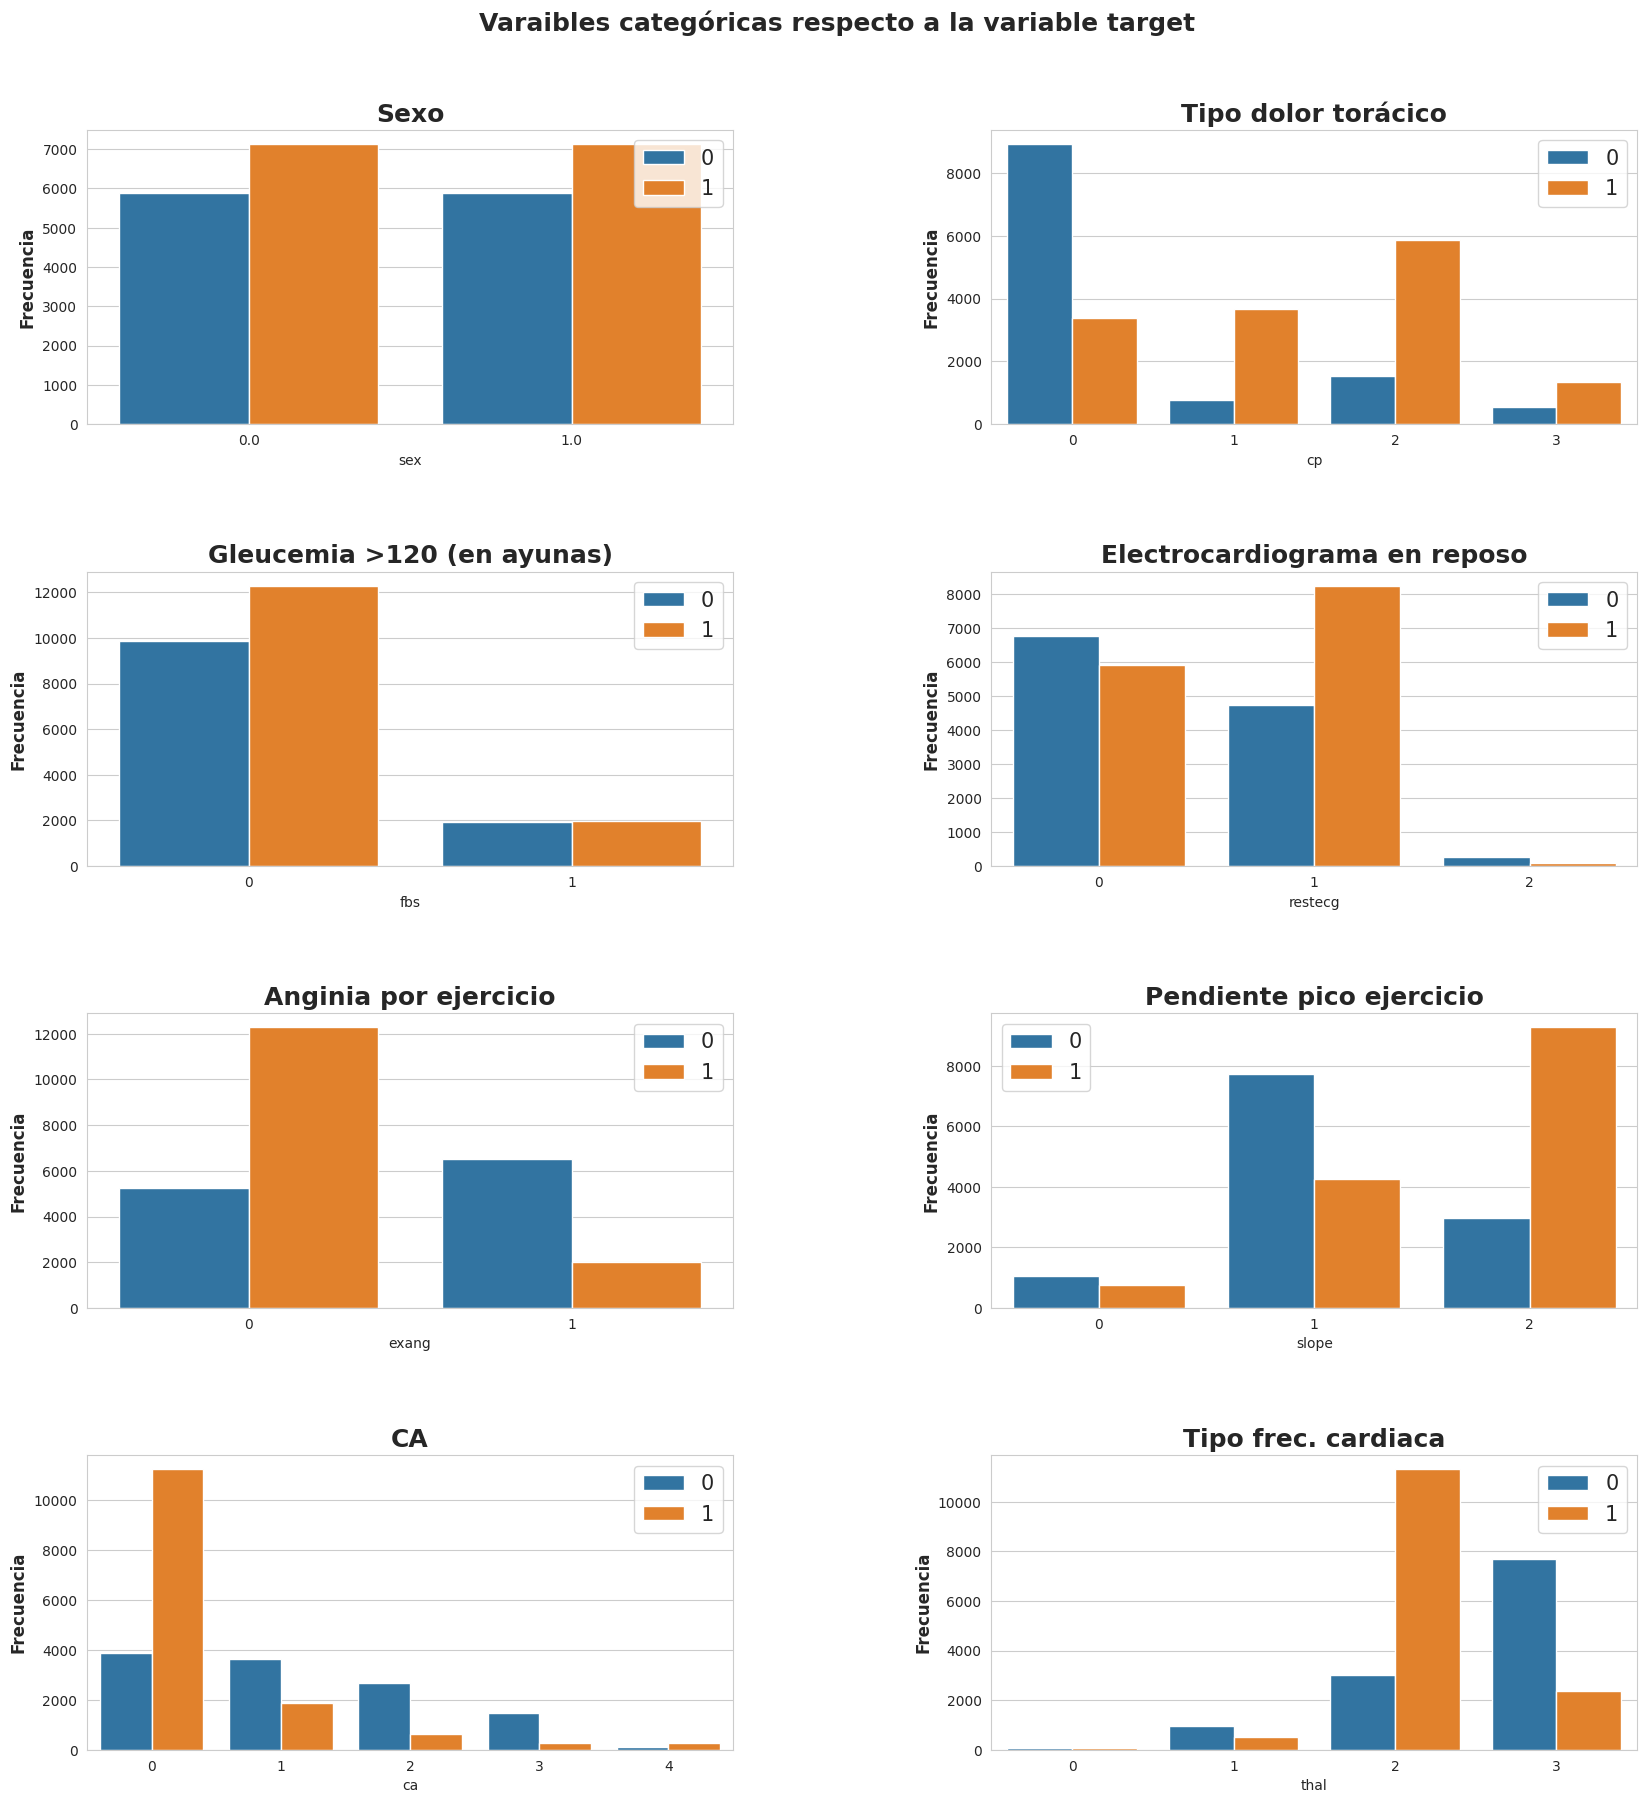

In [22]:
colnames_catego = ["sex","cp","fbs","restecg","exang","slope", "ca", "thal"]
nom_cate = ["Sexo", "Tipo dolor torácico", "Gleucemia >120 (en ayunas)", "Electrocardiograma en reposo", "Anginia por ejercicio","Pendiente pico ejercicio", "CA", "Tipo frec. cardiaca"]

fig = plt.figure(figsize=[20,20])
fig.suptitle('Varaibles categóricas respecto a la variable target', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(colnames_catego):
    a = fig.add_subplot(4, 2, i+1)
    a=sns.countplot(x = hypertension[col] , ax=a , hue = hypertension['target'] )
    a.set_title(nom_cate[i], fontsize=18, fontweight='bold')
    a.legend(fontsize=15)
    a.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')


En la variable tipo de dolor torácico (*cp*), el tipo asintomático es el único nivel de esta variable en la que el número de pacientes que no tiene hipertensión supera a los que sí la tienen, esto puede ser indicio de que el tipo de dolor torácico influye sobre si el paciente tiene o no hipertensión (hipótesis que podrá ser probada más adelante). En cuanto al nivel de gleucemia en ayunas (*fbs*), si la persona presenta un registro mayor a 120 mg/dl, esto no parece influir en el hecho de tener o no hipertensión, pues la cantidad de pacientes con fbs > 120 y con hipertensión es muy similar a los que no tienen hipertensión. 

Por otro lado, si el resultado del electrocardiograma es anormal (variable *resecg*), es más la cantidad de pacientes que padecen hipertensión a las que no, dando posibles indicios de que el estado de este resultado influye en la variable onjetivo, pues si se observa a lo que tienen electrocardiograma normal, la cantidad de pacientes sin hipertensión es mayor a los que la padecen.

Un comportamiento interesante se presenta en la variable de anginia inducida por el ejercicio (*exang*), se observa que la cantidad de pacientes hipertensos es mayor cuando los pacientes no presentan anginia inducida por ejercicio, mientras que cuando no presentan anginia, la cantidad de pacientes no hipertensos es mayor (¿por qué se podría presentar esto?). 

##### Variables continuas

Como primer paso en el análisis de variables continuas es interesante analizar el comportamiento de la correlación entre estas, así, se muestra a continuación la matriz de correlación de dichas variables:

In [23]:
hypertension.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.021836,0.018001,-0.050435,0.008104
trestbps,0.021836,1.000000,0.133460,-0.050889,0.203892
chol,0.018001,0.133460,1.000000,-0.007400,0.047298
thalach,-0.050435,-0.050889,-0.007400,1.000000,-0.344758
oldpeak,0.008104,0.203892,0.047298,-0.344758,1.000000


Y como apoyo gráfico se muestra un mapa de calor contruido con la función heatmap de la librería seaborn, que refleja el comportamiento de la correlación:

Text(0.5, 1.0, 'Mapa de calor - variables continuas')

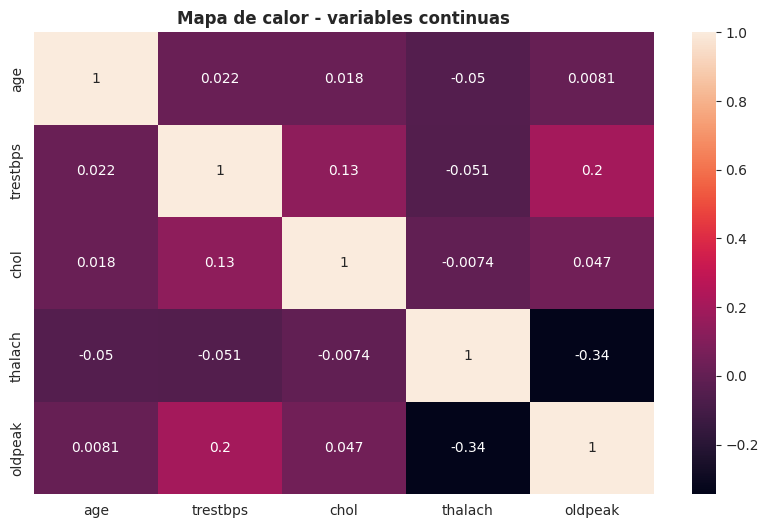

In [24]:
# Mapa de calor
ax1 = plt.figure(figsize=(10,6))
ab = sns.heatmap(data=hypertension.corr("pearson"),  annot = True)
ab.set_title("Mapa de calor - variables continuas", fontsize=12, fontweight='bold')

Con la matriz de correlación y el mapa de calor puede evidenciarse correlaciones bastante débiles (con valores cercanos a cero y colores oscuros) entre la mayoría de las variables. La correlación más evidente se presenta entre las variables que miden la frecuencia cardiaca máxima alcanzada (thalach) y la depresión del dolor de garganta legopedia, con un valor de correlación de Pearson de -0.34, indicando una correlación negativa moderada.

¿Cómo se comportan algunas variables continuas entre sí?

Ahora, ¿qué pasa con las variables que demuestran una correlación moderada? Para responder a esta pregunta se propone un gráfico de dispersión entre las variables frecuencia cardiaca máxima y depresión del ST, así:

Text(0, 0.5, 'Depresión del ST')

<Figure size 2000x2500 with 0 Axes>

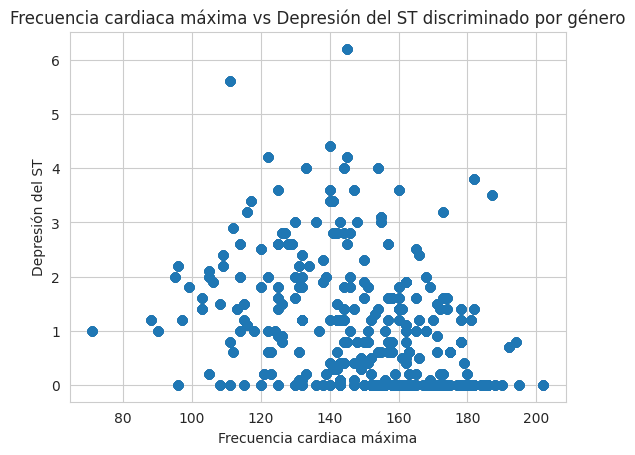

In [25]:
plt.figure(figsize=(20,25))
fig, ax = plt.subplots()
ax.scatter(hypertension.thalach, hypertension.oldpeak)
plt.title("Frecuencia cardiaca máxima vs Depresión del ST discriminado por género")
plt.xlabel("Frecuencia cardiaca máxima")
plt.ylabel("Depresión del ST")

De manera gráfica no es posible observar un patrón claro de comportamiento, sin embargo si se pueden observar algunos datos atípicos que pueden ser de particular interés más adelante.

¿Qué pasa con el gráfico anterior si se discrimina por sexo?

<Figure size 2000x2500 with 0 Axes>

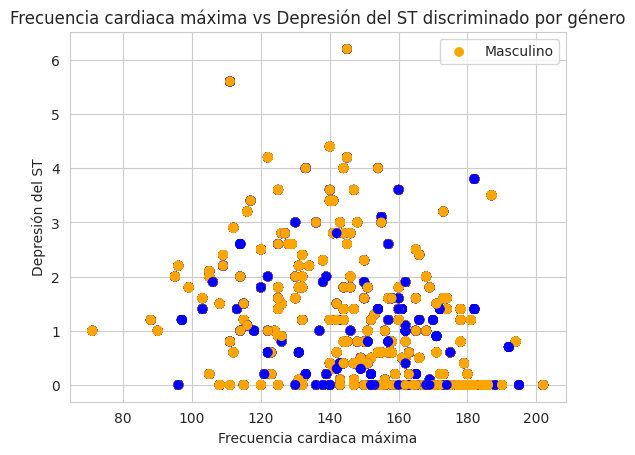

In [26]:
hyper_fig = hypertension.copy()

plt.figure(figsize=(20,25))
fig, ax = plt.subplots()
hyper_fig["sex"] = hyper_fig["sex"].astype("string")
colors = {'1.0':'orange', '0.0':'blue'}
ax.scatter(hypertension.thalach, hypertension.oldpeak, c=hyper_fig['sex'].map(colors))
plt.title("Frecuencia cardiaca máxima vs Depresión del ST discriminado por género")
plt.xlabel("Frecuencia cardiaca máxima")
plt.ylabel("Depresión del ST")
# Function add a legend  
plt.legend(["Masculino", "Femenino"], loc ="upper right")

Los hombres (color naranja) parecen registrar los datos máximos en ambas variables y presentar mayor dispersión en cuanto a los registros de las mujeres (color azul).

Y respecto al *target* (hipertensión o no), ¿cómo es el comportamiento de las variables continuas?

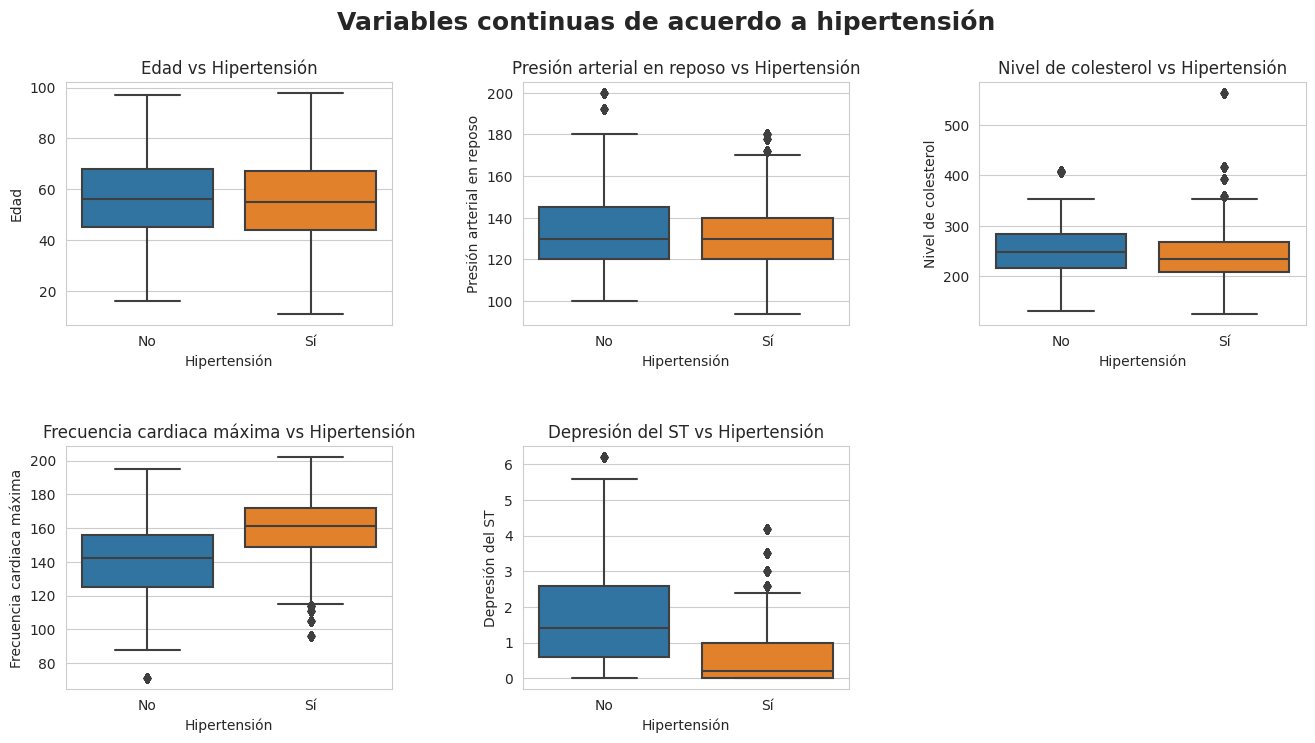

In [27]:
fig = plt.figure(figsize=[16,12])
fig.suptitle('Variables continuas de acuerdo a hipertensión', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
nom = ["Edad", "Presión arterial en reposo", "Nivel de colesterol", "Frecuencia cardiaca máxima", "Depresión del ST"]
for i ,col in enumerate(colnames_continuas):
    a = fig.add_subplot(3, 3, i+1)
    a=sns.boxplot(x = 'target' , y =col , ax=a  , data = hypertension )
    a.set_title(f'{nom[i]} vs Hipertensión')
    a.set_xticklabels(['No', 'Sí'])
    a.set_xlabel("Hipertensión")
    a.set_ylabel(nom[i])

En promedio, es mayor la frecuencia cardiaca máxima alcanzada por los pacientes que sufren hipertensión (¡Algo lógico!)

En cuanto a la presión arterial, en promedio no parece haber diferencias entre las personas que padecen hipertensión y quienes no la padecen.

Por otro lado, no parece haber diferencias, en promedio en el nivel de colesterol entre las personas que sufren hipertensión y las que sí, sin embargo, algunas personas que padecen la enfermedad parecen presentan mayores niveles de colesterol cérico

## Ajuste de modelos

In [28]:
hypertension.dtypes

age         float64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [29]:
hyper = hypertension.copy()
hyper.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
hyper.dtypes

age         float64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

Pasar el dataset a int

In [31]:
hyper_int = hyper.astype("int")
hyper_int.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [32]:
# Definición matriz de diseño:
X = hyper_int.drop("target",1)
# Deficinión variable respuesta:
y = hyper_int.target
print(X.shape, y.shape)

(26058, 13) (26058,)


In [33]:
X.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
dtype: object

### Feature selection

Con el fin de reducir la dimensionalidad de la base de datos, se implementa un método de selección de variables

#### Forward selection

La siguiente función de usuario realiza el proceso de selección hacia adelante de variables con un nivel de significancia $\alpha = 0.05$

In [34]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist() # lista con columnas
    best_features = [] # lista vacia para guardar features significativos
    while (len(initial_features)>0): # siempre y cuando esto sea mayor que 0 seguir
        remaining_features = list(set(initial_features)-set(best_features)) # operacion diferencia todas - features que van saliendo
        new_pval = pd.Series(index=remaining_features) # seria para guardar p valores
        for new_column in remaining_features: # para las columnas restates seguir evaluando
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit() # ajustar el modelo con target agregando columnas de una en una
            new_pval[new_column] = model.pvalues[new_column] # agregar a la serie el p valor para cada feature
        min_p_value = new_pval.min() # encontrar el p valor minimo (mas significativo)
        if(min_p_value<significance_level): # verificar si es menor a alpha
            best_features.append(new_pval.idxmin()) # agregar el nombre del feature
        else:
            break # cuando no se cumpla la condicion parar y salir
    return best_features

A continuación se muestra el código para que arroja las variables seleccionadas de acuerdo con el método de selección de variables forward

In [35]:
selected_var = forward_selection(X, y)

Es interesante comprobar esta salida con funciones de Python, ingresando el parámetro *k_feautures* con un valor de 9 (cantidad de variables seleccionadas con el código anterior)

In [36]:
sfs = SFS(LinearRegression(),
          k_features=9,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(X, y)
sfs.k_feature_names_   

('cp',
 'trestbps',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal')

Y se comprueba que ambas funciones (la de usuario *forward_selection()* y la de Python *SFS()*) obtienen las mismas variables

Así, la dimensionalidad del dataset ha sido reducida, pasa de tener 13 variables predictoras a tener 9 variables predictoras:

- Variables discretas:
    - cp: tipo de dolor torácico.
    - restecg: Resultado de electrocardiograma en reposo.
    - exang: Angina inducida por el ejercicio.
    - slope: Pendiente del pico de ejercicio del segmento ST.
    - ca: Número de vasos mayores (0-3) coloreados por flouroscopia.
    - thal: clasificación de frecuencia cardiaca.



- Variables continuas:
    - trestbps: presión arterial en reposo.
    - thalach: frecuencia cardíaca máxima alcanzada.
    - oldpeak: nivel de descenso del dolor de garganta logopedia

### Algoritmo de clasificación

Se toman de la base de datos original aquellas variables seleccionatas con el método forward

In [37]:
X_n = X[selected_var]
X_n

,oldpeak,ca,exang,thal,cp,thalach,slope,restecg,trestbps
0,2,0,0,1,3,150,0,0,145
1,3,0,0,2,2,187,0,1,130
2,1,0,0,2,1,172,2,0,130
3,0,0,0,2,1,178,2,1,120
4,0,0,1,2,0,163,2,1,120
...,...,...,...,...,...,...,...,...,...
26078,1,3,0,2,0,106,1,1,138
26079,0,0,1,3,0,126,1,0,144
26080,0,1,0,3,0,156,2,1,100
26081,0,1,0,2,1,164,2,0,154


### Regresión logística

Se implementa un modelo de regresión logística con la finalidad de entrenar los datos elegidos:

In [38]:
# Separar en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X_n,y,test_size=0.2, random_state=1)

In [39]:
print(f'La cantidad de datos para entrenamiento es: {len(y_train)} y la cantidad de datos para prueba es: {len(y_test)}')

La cantidad de datos para entrenamiento es: 20846 y la cantidad de datos para prueba es: 5212


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000, n_jobs=-1) 
# Ajustar modelo
model.fit(X_train, y_train) 
#Predicciones
predicciones = model.predict(X_test)

Se muestra la matriz de confusión para validar de manera gráfica el modelo:

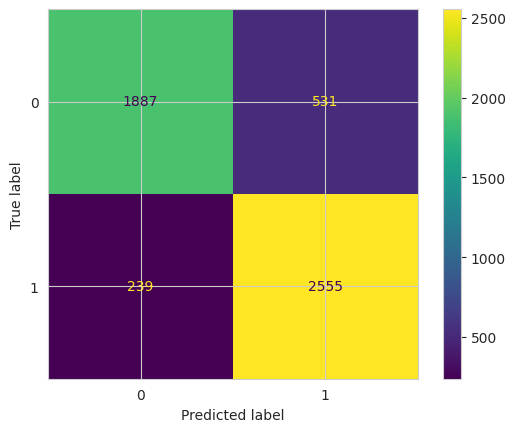

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicciones, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

Y se implementa el cálculo de métricas para validar el modelo:

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=predicciones))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2418
           1       0.83      0.91      0.87      2794

    accuracy                           0.85      5212
   macro avg       0.86      0.85      0.85      5212
weighted avg       0.86      0.85      0.85      5212



Con esto se tiene que:

- El algoritmo está clasificando correctamente de acuerdo a si tienen o no hipertensión al 85 % de los pacientes.
- El porcentaje de casos con hipertensión detectados por el modelo es de 83 %

In [43]:
from sklearn.datasets import load_iris

In [44]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import validation_curve

kf = KFold(n_splits=30)
list_training_error = []
list_testing_error = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = MLPRegressor()
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

KeyError: "None of [Int64Index([  869,   870,   871,   872,   873,   874,   875,   876,   877,\n              878,\n            ...\n            26048, 26049, 26050, 26051, 26052, 26053, 26054, 26055, 26056,\n            26057],\n           dtype='int64', length=25189)] are in the [columns]"

Bad pipe message: %s [b"j\xce\xf6\xae\xc6F\x0c\xa1h\x1e\xa2\xc6h\xc6:\xd3\x8a@\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00", b'\xff\x01\x00\x00']
Bad pipe message: %s [b'\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x03\x03\x02\x03\x03\x01\x02\x01\x03\x02\x02\x02\x04\x02\x05\x02\x06\x02']
Bad pipe message: %s [b'\xb0\xec\xd0\xfa\x82\x89\xc1\xfa0\x17\xdct\xe1\xb2\xc5]\xae\x1d\x00\x00\xf4

### ¿Overfitting y Underfitting?

Para evaluar esto, se utiliza la validación cruzada de K-folds, que es una técnica utilizada en el aprendizaje automático para evaluar el rendimiento de un modelo de manera más robusta y precisa. Esta técnica implica dividir los datos en K subconjuntos o "folds" de aproximadamente el mismo tamaño. Luego, se entrena el modelo K veces, cada vez utilizando un subconjunto diferente como conjunto de validación y los restantes como conjunto de entrenamiento.

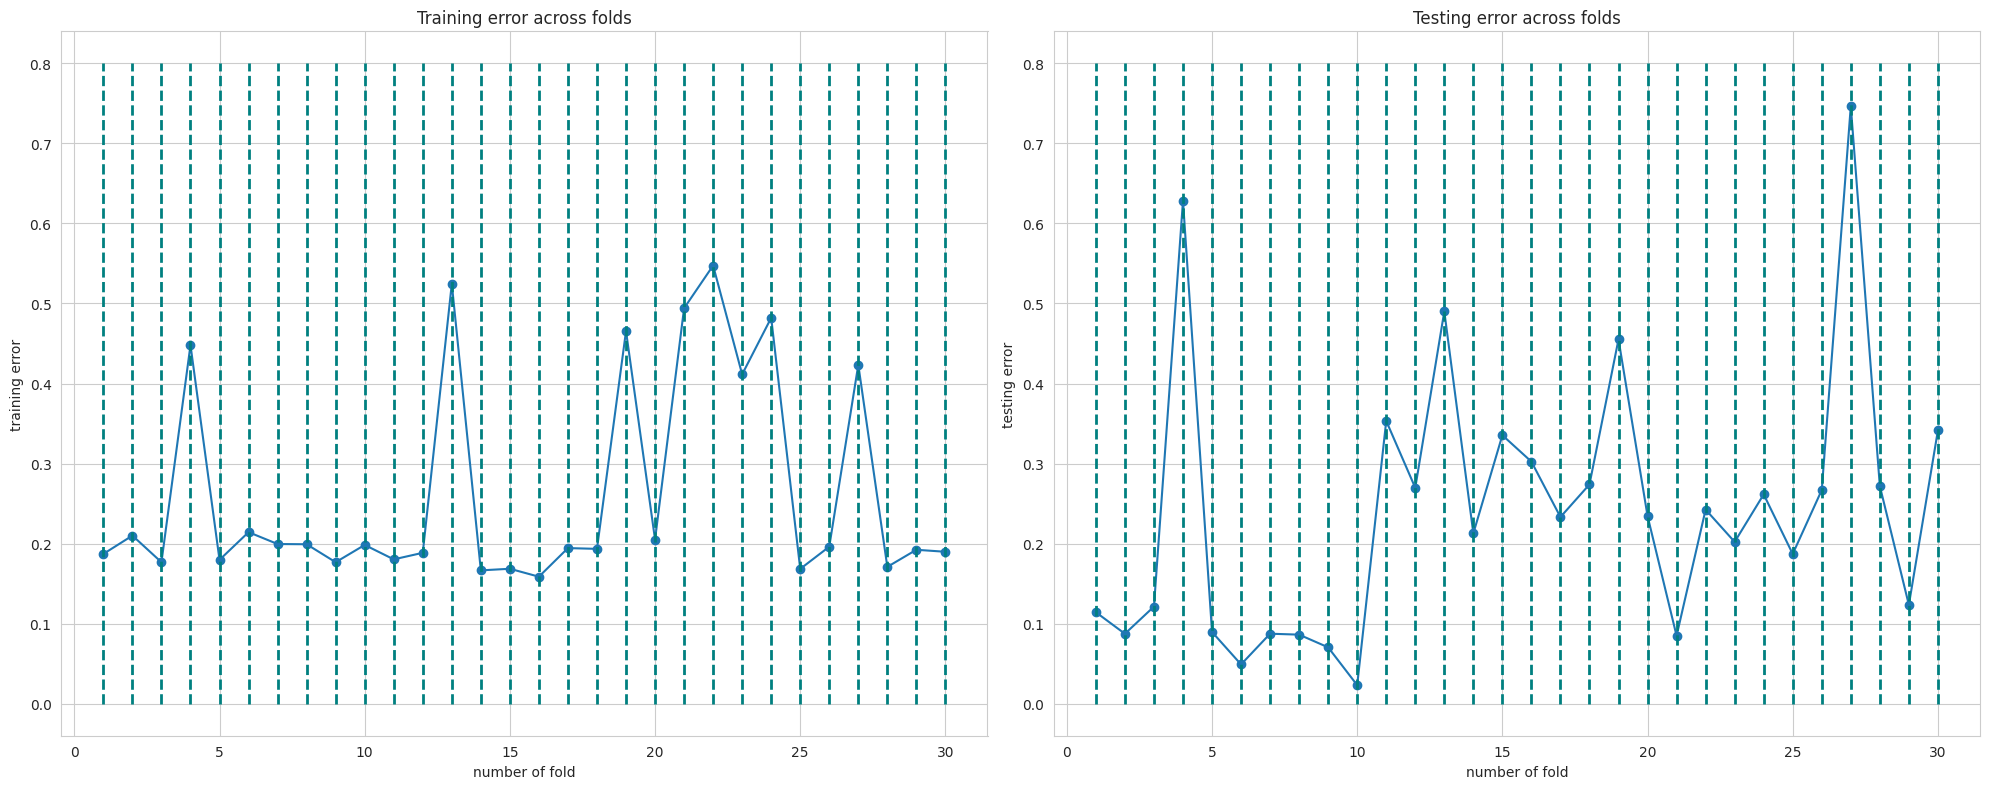

In [ ]:
xs = list(range(1,31,1))
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), "o-")
plt.vlines(x =xs, ymin=0, ymax=0.8, colors='teal', ls='--', lw=2, label='vline_multiple - full height')
plt.xlabel("number of fold")
plt.ylabel("training error")
plt.title("Training error across folds")
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), "o-")
plt.vlines(x =xs, ymin=0, ymax=0.8, colors='teal', ls='--', lw=2, label='vline_multiple - full height')
plt.xlabel("number of fold")
plt.ylabel("testing error")
plt.title("Testing error across folds")
plt.tight_layout()
plt.show()

Dentro de cada subconjunto se estima el error de entrenamiento y de prueba utilizando los conjuntos de entrenamiento y de prueba, respectivamente. Si se comparan las gráficas anteriores:

Se presenta overfitting cuando el error del modelo en el conjunto de entrenamiento es muy bajo, pero el error del modelo en el conjunto de prueba es muy grande: si se compara por ejemplo el subconjunto 27, al diferencia en los errores es considerable.
Por otro lado, el underfitting se produce cuando el error del modelo tanto en el conjunto de entrenamiento como en el de prueba es muy alto: el subconjunto 13 puede ser un ejemplo de esto.

## Conclusiones

- El algoritmo de clasificación implementado hasta ahora parece tener un buen desempeño, se evaluará más adelante con otras métricas dicho desempeño.
- El análisis de sobreajuste y sub-ajuste no ha sido muy profundo, sin embargo si puede proporcionar indicios de que se pueda presentar alguna de estas causas de bajo rendimiento del modelo, algo que será evaluado más adelante.

## Referencias

- Kaggle. (2015). Diabetes, Hypertension and Stroke Prediction. Recuperado de [https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=hypertension_data.csv].

- World Health Organization (WHO). (2021). World Health Organization. Hypertension. Recuperado de:  [https://www.who.int/news-room/fact-sheets/detail/hypertension]